# Statistical Methods and Financial Applications

## Quantitative Foundations
#### By Somil Varshney

------------------------------------------------------------------------------------------------------------------
## Key Concepts Covered:

1. Data Summarization
2. Probability
3. Distributions in Finance
4. Statistical Inference

#TBD!

5. Regression Analysis 
6. Time Series Foundations
------------------------------------------------------------------------------------------------------------------

In [4]:
#our first imports!
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, expon, norm

So we begin with the quantitative portion of the summer workshop. This is meant to be a refresher/introduction/point of reference (whatever you make it out to be, based on your current level of knowledge and confidence) and may seem dense, however, it is not expected of you to learn all of this in one sitting. 

Like many of the things covered this summer, this is not remotely exhaustive, but I have tried to cover as much content as possible. Many of these things are their own course but here we are trying to gain familiarity and applicability much more than a deep theoretical understanding. For that I would highly recommend taking courses such as STAT401 or STAT410!

By the end of this lecture I want you to *at least* understand and recognize these words, if not be able to connect why certain methods and mathematical tools are used to achieve specific results in the world of finance.

## Data Summarization

>Statistics is the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data

Key word here being **data**. The whole point of the field is recognizing the importance of data and being able to draw meaningful connections from it. Thus, we start of with talking about ways to **describe data**. 

### Types of Data

There are dozens of ways to categorize "types" of data however here are some common terms with examples:

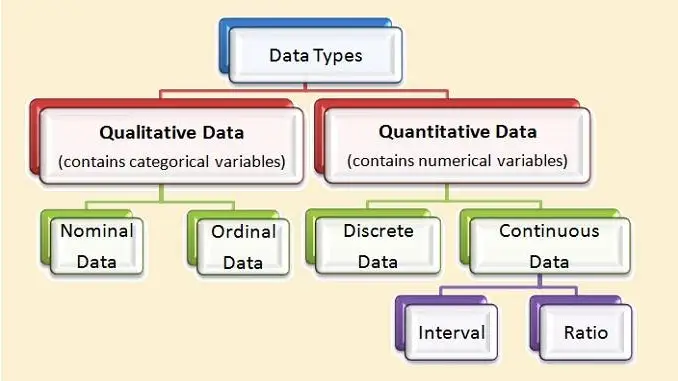

1. Qualitative/Categorical Data vs Quantitative/Numerical Data: Qualitative data describes characteristics vs quantitative data involves numerical measurements.

2. Continuous vs Discrete: can take any value within a range vs countable values (e.g., stock price at close: \\$142.37, where as discrete values would have been \\$142 or \\$143).

3. Ordinal vs Nominal: categories/labels/groups with inherent order/meaning vs arbritrary groupings(e.g., class grades where an A is meaningfully comparable to a D as opposed to types of fruit like the saying comparing apples and oranges!). 

**Finance note:** Generally the type of computations we will be doing are quantitative, working especially with continuous data. There are various applications of categorical variables being used however they often get encoded numerically for modeling (i.e. say we are measuring effects of nationality of CEO on executive compensation in the industry so U.S. might be 1, France might be 2, etc.).

(Q) Why are continuous variables used more often in quantitative financial applications compared to discrete or categorical?

### Population vs Sample

A population is the whole and a sample is, well, a sample of said population!

E.g. Taking the heights of your peers (sample) to estimate the heights of every person in the state of Maryland (population).

(Q) Would taking every second (generally smallest increment of record in multi-year datasets) of 140 years of trading data for a traded security (entire history; petabytes of data possibly) to calculate the average price be a population or sample average?

### Descriptive statistics.

> Descriptive statistics are a set of brief descriptive coefficients that summarize a given dataset representative of an entire or sample population.

Having mentioned types of data, we now discuss being able to **quickly say something *meaningful* about a dataset, without delving into the nuances**.

Lets mention some of these coefficients now. Some of these are obvious, others may be less so!

1. Mean/Average: The average value in a dataset
2. Median: Middle value in a dataset

(Q) The median of a dataset is said to be more robust to outliers than the average. Why?

In [3]:
data = [1, 2, 3, 1, 3, 5, 7, 1200]
print(f"Mean: {np.mean(data)}, Median: {np.median(data)}")

Mean: 152.75, Median: 3.0


3. Variance/Standard Deviation: The spread of points of data relative to the mean. 

**Finance note:** Standard Deviation is the generally seen as the default measure of **Risk** in finance.

**Statistics note:** There is an important distinction in the calculation of sample and population variance, with important implications. 

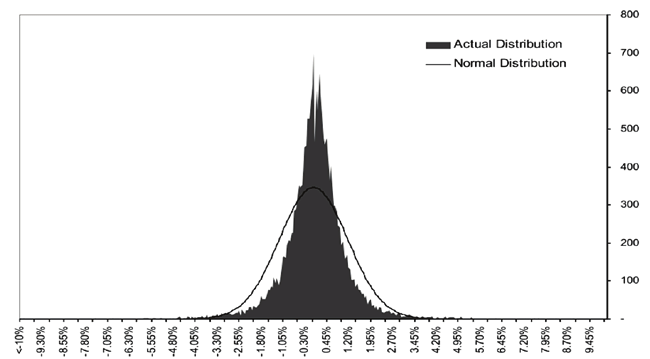

**This is to account for the degrees of freedom lost while calculating multiple parameters of a population from the same sample.** Think of it this way: you have to pay a small penalty in the form of $(n-1)$ when calculating not only the mean (no penalty) but *also* the variance (n-1 penalty). This continues the more parameters you calculate (say the Correlation Coefficient in linear regression where you divide by n-2).

(Q) Why is it important to consider Bessel's correction (considering the loss of degrees of freedom; dividing by n-1 vs n) in calculating sample variance in finance? 

*Hint: think what calculating a biased standard deviation (risk) of a stock return could result in*

(Q) Why is the standard deviation a more intuitive definition of risk as opposed to variance?

4. Skewness: symmetry of distribution (left-skewed in risk-return -> frequency of low returns is higher)
5. Kurtosis: tail heaviness (high kurtosis = fat tails -> higher extreme risk).

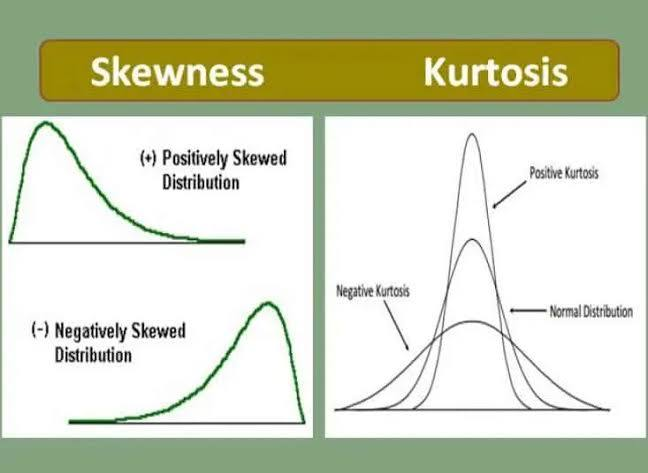

Financial Implications:

- Skewness - Options strategies often have asymmetric return profiles.
- Kurtosis - Extreme events (2008 crash) happen more often than normal models suggest.

Recognizing these early prevents underestimating risk.

Example: 

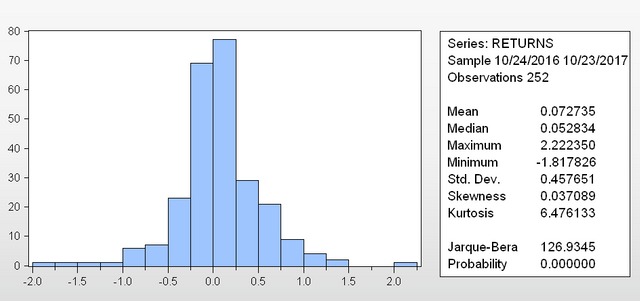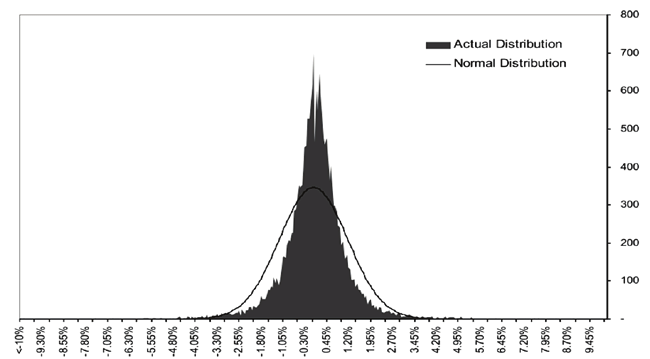
*via steemit.com/finance/@inthearena/*

Comparing to the normal distribution, this is the **Distribution of Daily Returns of the SP500**. We see fatter tails than the normal distribution, implying a higher frequency of tail-events (unlikely events).

## Probability 

### Random Variables (RV)

A variable whose possible values are outcomes of a random process. Random variables can be discrete or continuous. (e.g., Trade Volume -> Discrete RV (number of trades that occur associated with a specific security) vs Daily returns of an asset -> Continuous RV)

Notation: $\mathbf{X}$ -> Random Variable, $\mathbf{x}$ -> Realized value of Random Variable

### Probability Distributions

A probability distribution is a function that describes the likelihood of different outcomes in a random experiment. It assigns probabilities to each possible value of a random variable, showing how likely each outcome is.

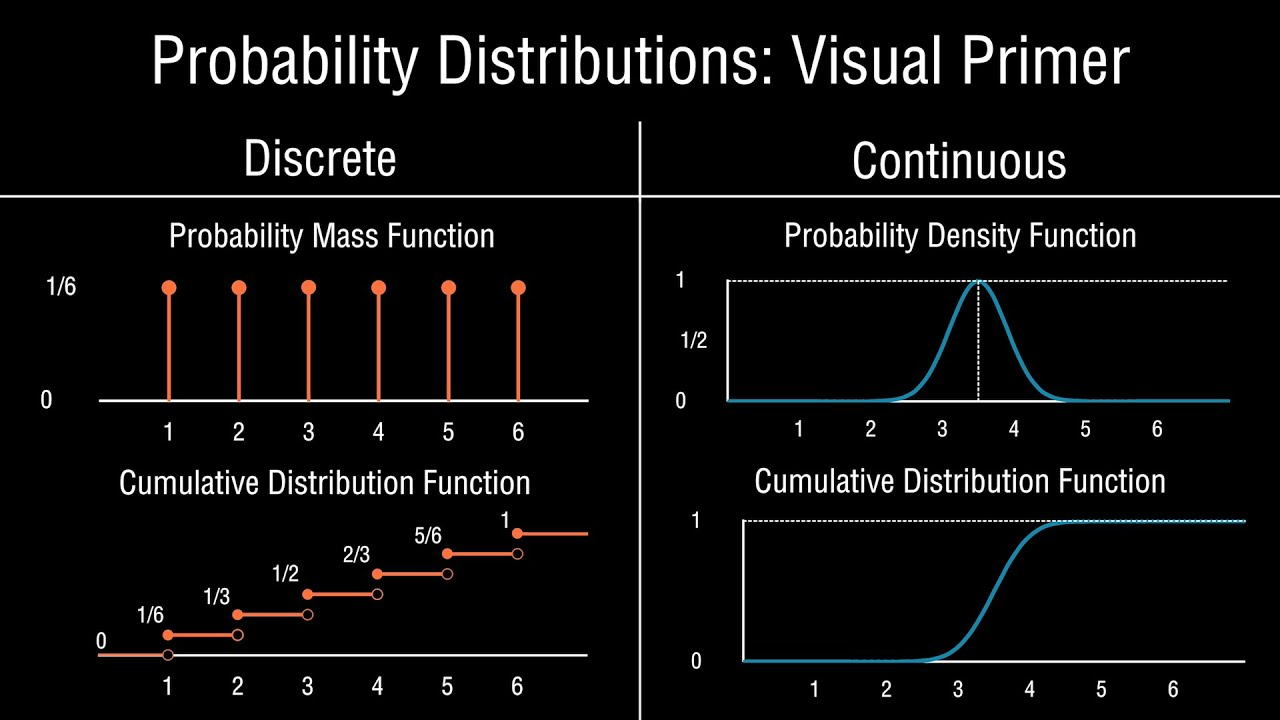

**Finance Examples:** 

PMF -> Probability of Number of Loan Defaults in a portfolio (think from a lender perspective)
PDF -> Probability a daily return falls between -2% and +2%.
CDF -> Measures like Value at Risk (VaR) which are essentially an inverse CDF

### Expected Value, Variance, Covariance, Correlation

> Random variables, by definition, can take different values. The range of values a random variable takes and the variation among them is determined by the distribution of that random variable.

- Expected Value (EV): the value to expect from a RV *on average*.
- Variance: how much the RV deviates from its EV.
- Covariance: Considering two RVs X and Y, how much the Variance of X changes with respect to the Variance of Y.
    - Intuitively: analyzing the behavior of two RVs as a pair
    - Output: Direction of Linear Relationship (Poitive/Negative value implies Direct/Inverse relationship)

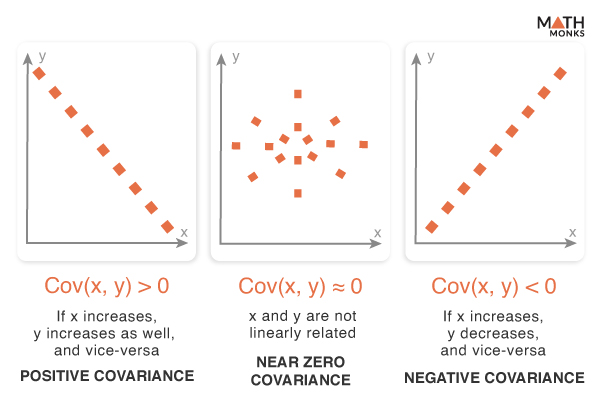

- Correlation: Given direction of relationship by Covariance, Correlation provides *strength* of relationship.
    - Output: [-1, 1], unlike Covariance which is not similarly bounded
    
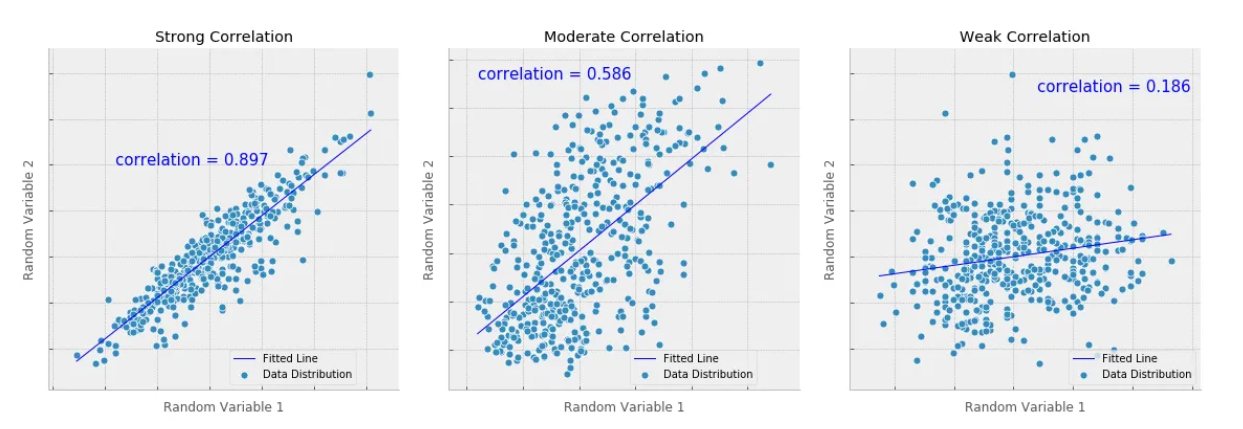
*via Deepak Khandelwal on Medium*

**Associated Formulas:**

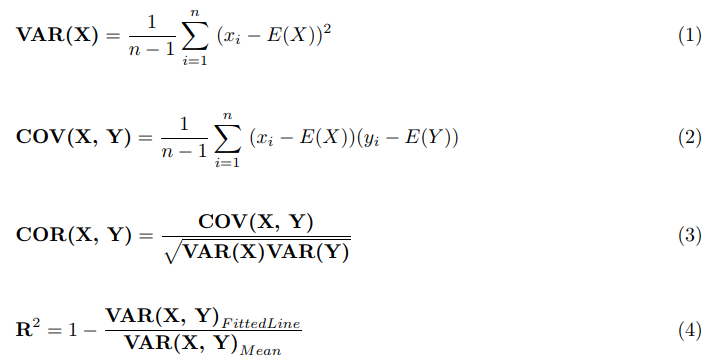

### Independent and Identically Distributed (I.I.D.)

Being i.i.d. has important implications on the distribution of an RV.

- Independent: Knowing the outcome of one observation gives no information about another.
    - Finance Implication: Returns of different days can be thought of as independent of each other (will touch on this further with autocorrelation- this is seen as empirically untrue sometimes)

- Identically distributed: All observations come from the same probability distribution.
    - Finance Implication: Assumes no structural change in the market — often violated in crises.

Why important: Many statistical results (LLN, CLT) assume i.i.d. thus to get to apply CLT, etc. we need i.i.d first

### Law of Large Numbers
As the number of trials or observations in an experiment increases, the average outcome of those trials will converge towards the expected value.

Intuition: More data -> better estimate of expected return.

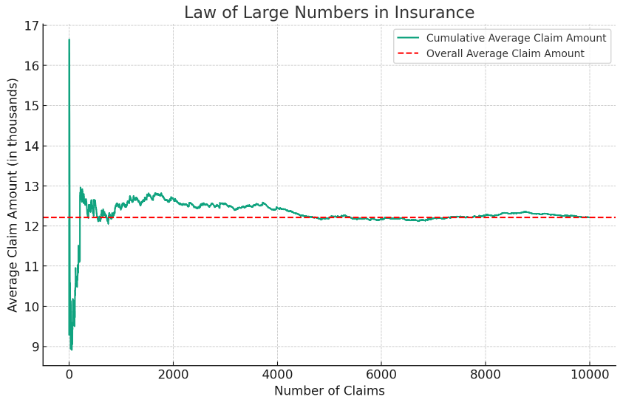

### Central Limit Theorem

> According to the central limit theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the populations's distribution of the data. 

**Key Takeaway: Regardless of population's distribution**

In the real world we rarely have perfect normal distributions however it is very, VERY convenient to treat things as normal distributions, whether that is to make the math easier, make intuitions more straightforward, etc. 

This make the CLT incredibly valuable as the sampling distribution of the sampling mean of any distribution (essentially the real world) can be estimated to a normal distribution as n aproaches infinit.

**In practice it is sufficient for n to be larger than 30 to apply CLT** however this is a rule of thumb and often breaks down when the original distribution is skewed or heavy-tailed.

Finance applications (*via cqf.com*): 

> The Central Limit Theorem suggests that the distribution of market returns, which can be seen as the sum or average of numerous individual price changes, tends to be approximately normal. This assumption of normality is often made in quantitative models and statistical analysis.

> The CLT has important implications for portfolio returns. If the returns of individual assets in a portfolio are i.i.d., the portfolio's overall return distribution will tend to become more normal as the number of assets in the portfolio increases. This allows for the application of various statistical techniques and portfolio optimization methods that assume normality.

## Distributions in Finance

In finance, understanding the shape of the data distribution is crucial. Returns, risk measures, and extreme events all depend on the underlying distribution. We’ll compare common distributions and see how to visually assess them.

### Z-distribution vs T-distribution

A **Z-distribution** is the standard normal distribution i.e. mean = 0, standard deviation = 1.

- Shape: perfectly symmetric, bell-shaped, thin tails.
- When to use:
    - You know the population standard deviation
    - Sample size is large (Central Limit Theorem applies)
- Example: testing if a stock’s mean return differs from a benchmark (say the SP500) when standard deviation is known.

A **T-distribution** is similar to normal but with heavier tails -> more probability for extreme values. It exists when the population standard deviation is unknown and must be estimated from the sample.

Generally a T-distribution implies smaller sample sizes and to account for the lack of data **we assume lesser degrees of freedom** i.e. a penalty to account for underestimation/bias due to fewer points of data.

Degrees of freedom: controls tail thickness; smaller -> fatter tails.

- Converges to Z-distribution as sample size -> infinity
- When to use:
    - You don't know the population standard deviation
    - Small sample sizes
- Example: small-cap stock returns, extreme events, or small-sample inference.

### Types of Distributions Seen in Finance

#### Normal Distribution:
- Symmetric, bell-shaped, fully described by mean and standard deviation.
- Central to classical finance models: CAPM, Black-Scholes assume normal returns.
- Limitation: Underestimates extreme events (“fat tails”).

#### Heavy-Tailed Distributions (e.g., t-distribution):
- More probability mass in the tails -> higher chance of extreme losses/gains.
- t-distribution has less degrees of freedom -> fatter tails.
- Example: daily stock returns often show more extreme events than a normal distribution would predict as seem from the earlier graph of SP500 daily returns.

#### Chi-Square Distribution $\tilde{\chi}^2$
- Sum of squared standard normal variables.
- Used in variance testing, goodness-of-fit tests, and risk modeling.
- Right-skewed; shape depends on degrees of freedom.
- Example: testing if a portfolio’s realized variance significantly deviates from expected variance.

#### Exponential Distribution
- Models time between events (waiting times), e.g., time until default, inter-trade durations.
- Memoryless property: probability of an event in the next interval doesn’t depend on past.
- Example: modeling the time between successive trades or defaults in a credit portfolio.

This is in no way a comprehensive list however covers a lot of commonly seen distributions.

**Finance note:** Risk models assuming normality oftem underestimate the likelihood of extreme events. These events in Finance and Economics are also called **Black Swan Events**, which are highly improbable, impactful, and unpredictable occurrence that is often explained away as obvious in hindsight. The term was popularized by Nassim Nicholas Taleb in his book "The Black Swan". This forms part of this week's optional reading/video [here](https://www.superdatascience.com/podcast/sds-715-make-better-decisions-with-data-with-dr-allen-downey)!

Below are some visual examples of these distributions with artificially generated data!

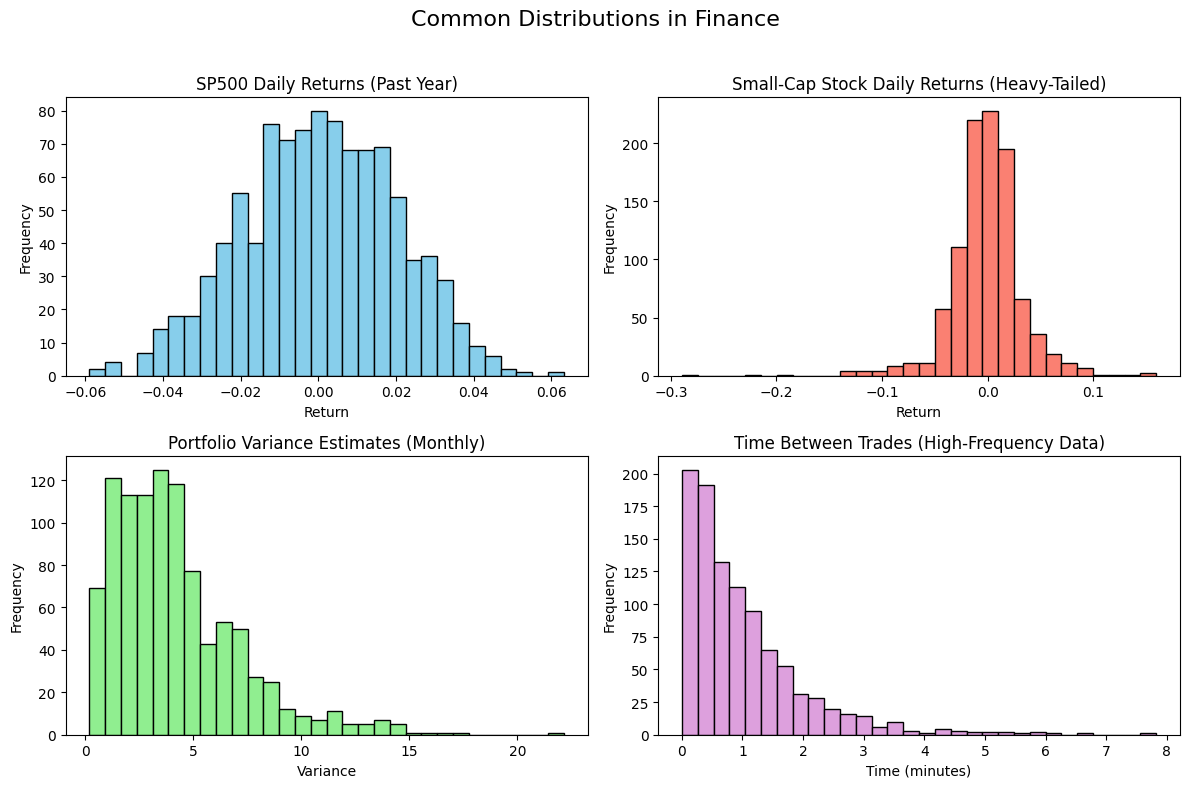

In [6]:
n = 1000

normal_returns = np.random.normal(loc=0, scale=0.02, size=n)       # daily returns ~2% SD
t_returns = np.random.standard_t(df=3, size=n) * 0.02               # heavy-tailed returns
chi_samples = chi2.rvs(df=4, size=n)                                # variance-like example
exp_samples = expon.rvs(scale=1, size=n)                             # time-between-events

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Common Distributions in Finance", fontsize=16)

# 1. Normal
axs[0, 0].hist(normal_returns, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("SP500 Daily Returns (Past Year)")
axs[0, 0].set_xlabel("Return")
axs[0, 0].set_ylabel("Frequency")

# 2. t-distribution
axs[0, 1].hist(t_returns, bins=30, color='salmon', edgecolor='black')
axs[0, 1].set_title("Small-Cap Stock Daily Returns (Heavy-Tailed)")
axs[0, 1].set_xlabel("Return")
axs[0, 1].set_ylabel("Frequency")

# 3. Chi-square
axs[1, 0].hist(chi_samples, bins=30, color='lightgreen', edgecolor='black')
axs[1, 0].set_title("Portfolio Variance Estimates (Monthly)")
axs[1, 0].set_xlabel("Variance")
axs[1, 0].set_ylabel("Frequency")

# 4. Exponential
axs[1, 1].hist(exp_samples, bins=30, color='plum', edgecolor='black')
axs[1, 1].set_title("Time Between Trades (High-Frequency Data)")
axs[1, 1].set_xlabel("Time (minutes)")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Statistical Inference

Once we have data, we want to estimate underlying parameters (mean, variance, etc.) and make decisions under uncertainty. This is the heart of statistical inference in finance, from estimating expected returns to testing whether a **trading signal** is genuine (say I have a model that is a linear equation on a signal x whose coefficient is either a 0 or 1 indicating a buy or sell -> the coefficient is a trading signal).

### Estimators
Estimation is a process in which we obtain the values of unknown population parameters with the help of sample data. 

> Point and Interval estimates are the two forms of population parameter estimation based on sample data. Point estimation is very easy to compute. However, the interval estimate is a much more robust and practical approach than the point estimate.

(*via sixsigmastudyguide.com*)

#### Point Estimator

Single-value estimate the most likely value of the corresponding unknown population parameter using the sample data.

> For example, 62 is the average (x̅) mark achieved by a sample of 15 students randomly collected from a class of 150 students, which is considered the mean mark of the entire class. Since it is in the single numeric form, it is a point estimator.

In financial applications, we can think of it like calculating the sample mean as a corollary to expected return and sample variance for volatility of returns.

A concern regarding point estimates is that no information is available regarding their reliability. In fact, the probability that a single sample statistic is equal to the population parameter is very unlikely.

#### Interval Estimator

Interval estimators provide a range of plausible values for a parameter from the sample data so that the population parameter will likely occur within the range at a specified probability. Accordingly, the specified probability is the level of confidence.

This is most commonly seen in **Confidence Intervals**

The benefits of these are that they are broader thus possibly more accurate than a point estimate.

#### Confidence Interval

Using an appropriate level of confidence **determined by an alpha value, commonly 5%)** we can create a 95% confidence interval. 

**This does not mean that the underlying population parameter is 95% likely to be in the interval, rather rather, 95% of samples taken will produce an interval that contains the true population parameter.**

Estimator Properties:

- Unbiasedness: Expected value equals true parameter
- Consistency: Converges to true parameter as n -> infinity
- Efficiency: Has minimum variance among unbiased estimators

### Bias-Variance Trade-off

The bias-variance tradeoff is a fundamental concept in machine learning and statistics that describes the relationship between a model's complexity, its ability to fit training data, and its ability to generalize to new, unseen data. 

It essentially means that as you make a model more complex to fit the training data better (reducing bias), you may inadvertently make it more sensitive to the specific training data, leading to higher variance and poor performance on new data. Conversely, a simpler model might have low variance but high bias, leading to inaccurate predictions on both training and new data. 

This is important to consider when working with estimators as we want them to be as **unbiased** and **least-variant** as possible to get the best possible estimate. This results in the **Minimum Variance Unbiased Estimator** which is an unbiased estimator that has the smallest variance among all unbiased estimators. 